In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz, plot_cargas

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado
Dado un proyecto con los datos que se muestran en la tabla siguiente, se pide:

In [3]:
periodo_probabilidad_b = 9
limite_maximo_recursos = [4]
pregunta_1 = "1. Dibujar el diagrama Pert y determinar el camino crítico.  "
pregunta_2 = f"2. Probabilidad de terminar el proyecto antes de {periodo_probabilidad_b} periodos.  "
pregunta_3 = "3. Reducir la duración del proyecto hasta 10 periodos con el mínimo incremento posible de coste.  "
pregunta_4 = f"4. Si el número máximo de recursos durante las 6 primeras semanas es {limite_maximo_recursos[0]}, determinar si será posible realizar el proyecto en el tiempo obtenido en el apartado 1.  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))

1. Dibujar el diagrama Pert y determinar el camino crítico.  

2. Probabilidad de terminar el proyecto antes de 9 periodos.  

3. Reducir la duración del proyecto hasta 10 periodos con el mínimo incremento posible de coste.  

4. Si el número máximo de recursos durante las 6 primeras semanas es 4, determinar si será posible realizar el proyecto en el tiempo obtenido en el apartado 1.  

In [5]:
# Alargamos el ancho de las celdas al 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado= pd.DataFrame([
#actividad, precedentes, duracion, desviacion,  cur, recursos, duracion_tope
  (   'A',     '--- ',       3,         2,        5,      1,       1  ),
  (   'B',     '--- ',       2,         1,        5,      1,       1  ),
  (   'C',     'B   ',       4,         2,       25,      1,       2  ),
  (   'D',     'A   ',       2,         1,      -10,      2,       1  ),
  (   'E',     'A   ',       4,         0,        1,      1,       4  ),
  (   'F',     'E   ',       3,         1,        5,      1,       2  ),
  (   'G',     'C,D ',       1,         0,      -20,      2,       1  ),
  (   'H',     'C,D ',       5,         3,        1,      1,       2  ),
  (   'I',     'F,G,H',      1,         0,        1,      1,       1  ),
  (   'J',     'F,G  ',      2,         0,       -1,      1,       2 ),
  (   'K',     'F,G  ',      1,         0,        5,      2,       1  ),
], columns=['activity', 'predecessor', 'duration', 'standard_deviation', 'ucr', 'resources', 'cap_duration']).set_index('activity')
datos_enunciado

,predecessor,duration,standard_deviation,ucr,resources,cap_duration
activity,,,,,,
A,---,3,2,5,1,1
B,---,2,1,5,1,1
C,B,4,2,25,1,2
D,A,2,1,-10,2,1
E,A,4,0,1,1,4
F,E,3,1,5,1,2
G,"C,D",1,0,-20,2,1
H,"C,D",5,3,1,1,2
I,"F,G,H",1,0,1,1,1


# Solución
## Apartado 1

In [6]:
display(Markdown(pregunta_1))

1. Dibujar el diagrama Pert y determinar el camino crítico.  

### Cuadros de prelaciones expandido

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.


In [7]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K
activities,,,,,,,,,,,
A,,,,,,,,,,,
B,,,,,,,,,,,
C,,True,,,,,,,,,
D,True,,,,,,,,,,
E,True,,,,,,,,,,
F,,,,,True,,,,,,
G,,,True,True,,,,,,,
H,,,True,True,,,,,,,
I,,,,,,True,True,True,,,


### Grafo PERT con numeración de nodos

Utilizando el cuadro de prelaciones expandido podemos dibujar el grafo Pert correspondiente al proyecto.

In [8]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto_apartado_1 = datos_proyecto.copy() # La necesitaremos en el apartado 4

In [9]:
proyecto = prelaciones.create_project()

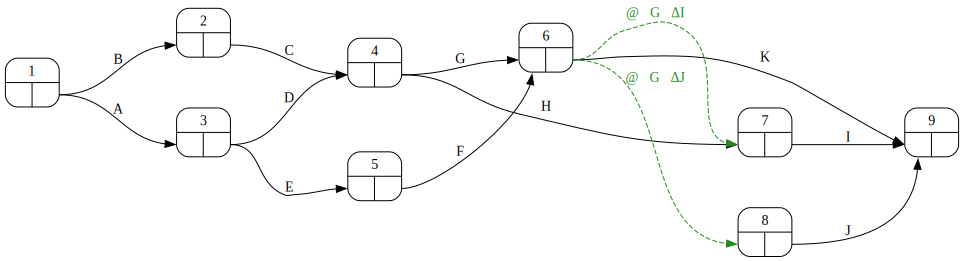

In [10]:
#| fig-cap: "Grafo Pert con indicación con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto.pert(ranksep=1.5, nodesep=0.7)

Alternativamente podríamos haber representado su grafo Roy.


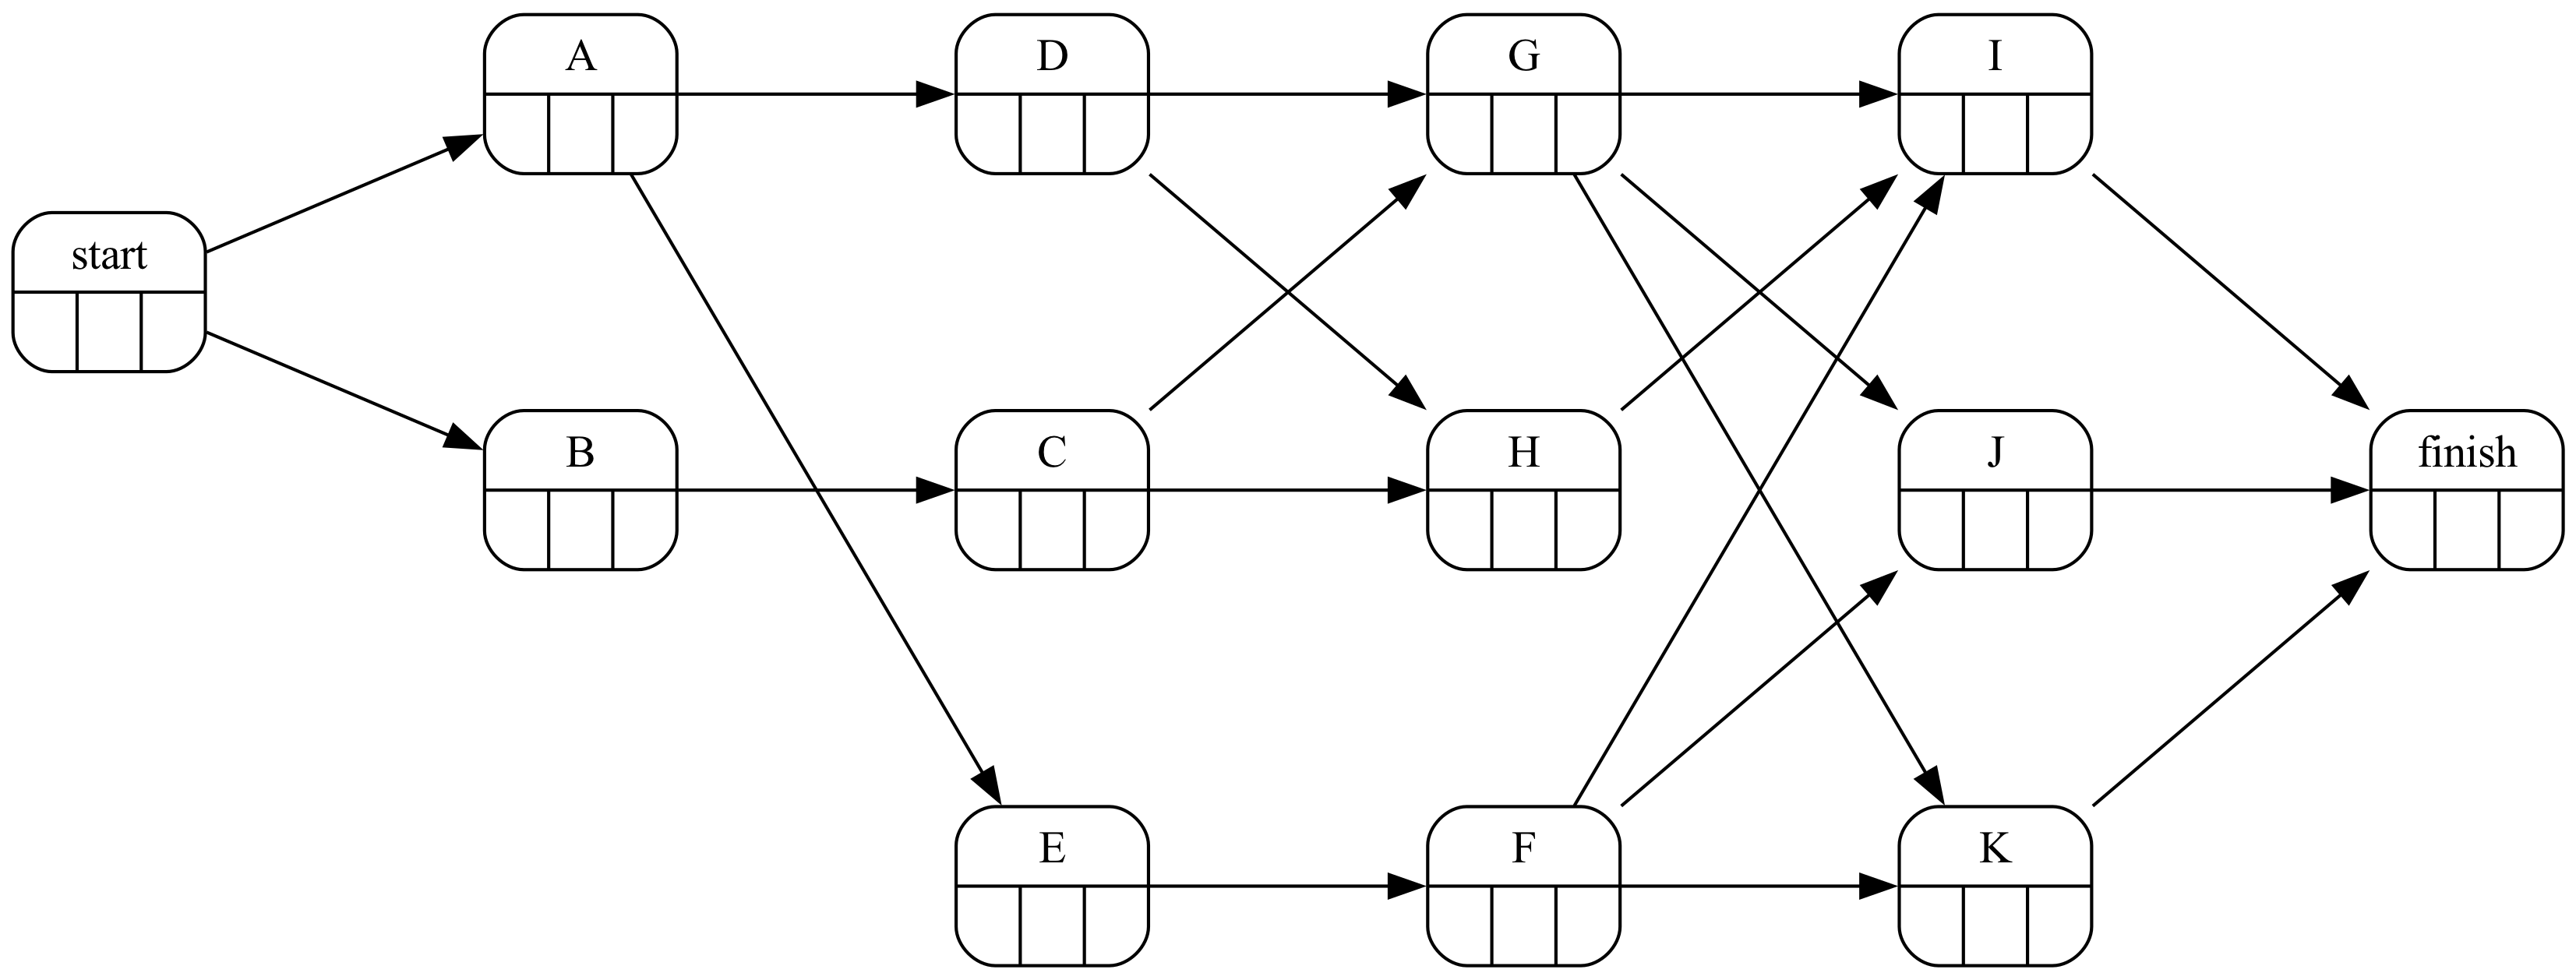

In [11]:
#| fig-cap: "Grafo Roy del proyecto"
#| label: fig-roy
proyecto.roy(ranksep=1.2, nodesep=1)

### Matriz de Zaderenko

A continuación podemos determinar la duración del proyecto calculando los tiempos tempranos y tardíos de su grafo Pert. Se hace en este caso mediante el algoritmo de Zaderenko:

In [12]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,early
1,,2.0,3.0,,,,,,,0.0
2,,,,4.0,,,,,,2.0
3,,,,2.0,4.0,,,,,3.0
4,,,,,,1.0,5.0,,,6.0
5,,,,,,3.0,,,,7.0
6,,,,,,,0.0,0.0,1.0,10.0
7,,,,,,,,,1.0,11.0
8,,,,,,,,,2.0,10.0
9,,,,,,,,,,12.0
late,0.0,2.0,3.0,6.0,7.0,10.0,11.0,10.0,12.0,


Los tiempos tempranos y tardíos obtenidos para cada nodo son:

In [13]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,2,2
3,3,3
4,6,6
5,7,7
6,10,10
7,11,11
8,10,10
9,12,12


### Duración media del proyecto

In [14]:
duracion_media_proyecto = proyecto.duration(durations=datos_proyecto['duration'])
Markdown(f"De acuerdo a la duración obtenida para el nodo final del proyecto, la duración media del proyecto es {duracion_media_proyecto} periodos.")

De acuerdo a la duración obtenida para el nodo final del proyecto, la duración media del proyecto es 12 periodos.

### Calendario del proyecto
Las fechas de inicio y fin más tempranas y tardías de cada actividad son:

In [15]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duration'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
activity,,,,,,
A,0,0,3,3,0,3
B,0,0,2,2,0,2
C,2,2,6,6,0,4
D,3,4,5,6,1,2
E,3,3,7,7,0,4
F,7,7,10,10,0,3
G,6,9,7,10,3,1
H,6,6,11,11,0,5
I,11,11,12,12,0,1


#### Holgura total de las actividades
Del cálculo de las holguras totales obtenemos:

In [16]:
#| tbl-cap: "Holgura total de las actividades"
#| label: tbl-holguras
resultados_pert['activities'][['H_total']]

,H_total
@∇G⤑ΔI,1
@∇G⤑ΔJ,0
A,0
B,0
C,0
D,1
E,0
F,0
G,3
H,0


#### Camino crítico
Las actividades con holgura total cero forman el camino crítico. Según el grafo Pert del proyecto, éste está compuesto por las siguientes rutas, cuyas actividades se listan en orden alfabético:

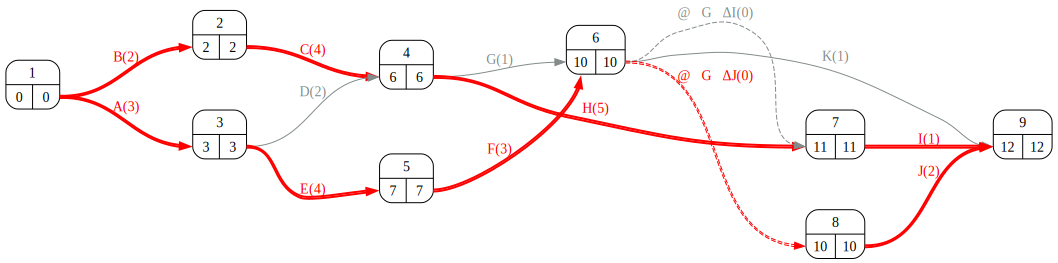

In [17]:
#| fig-cap: "Grafo Pert con indicación con indicación del camino crítico"
#| label: fig-pertcritico
proyecto.pert(durations=datos_proyecto['duration'], ranksep=1.5, nodesep=0.7)

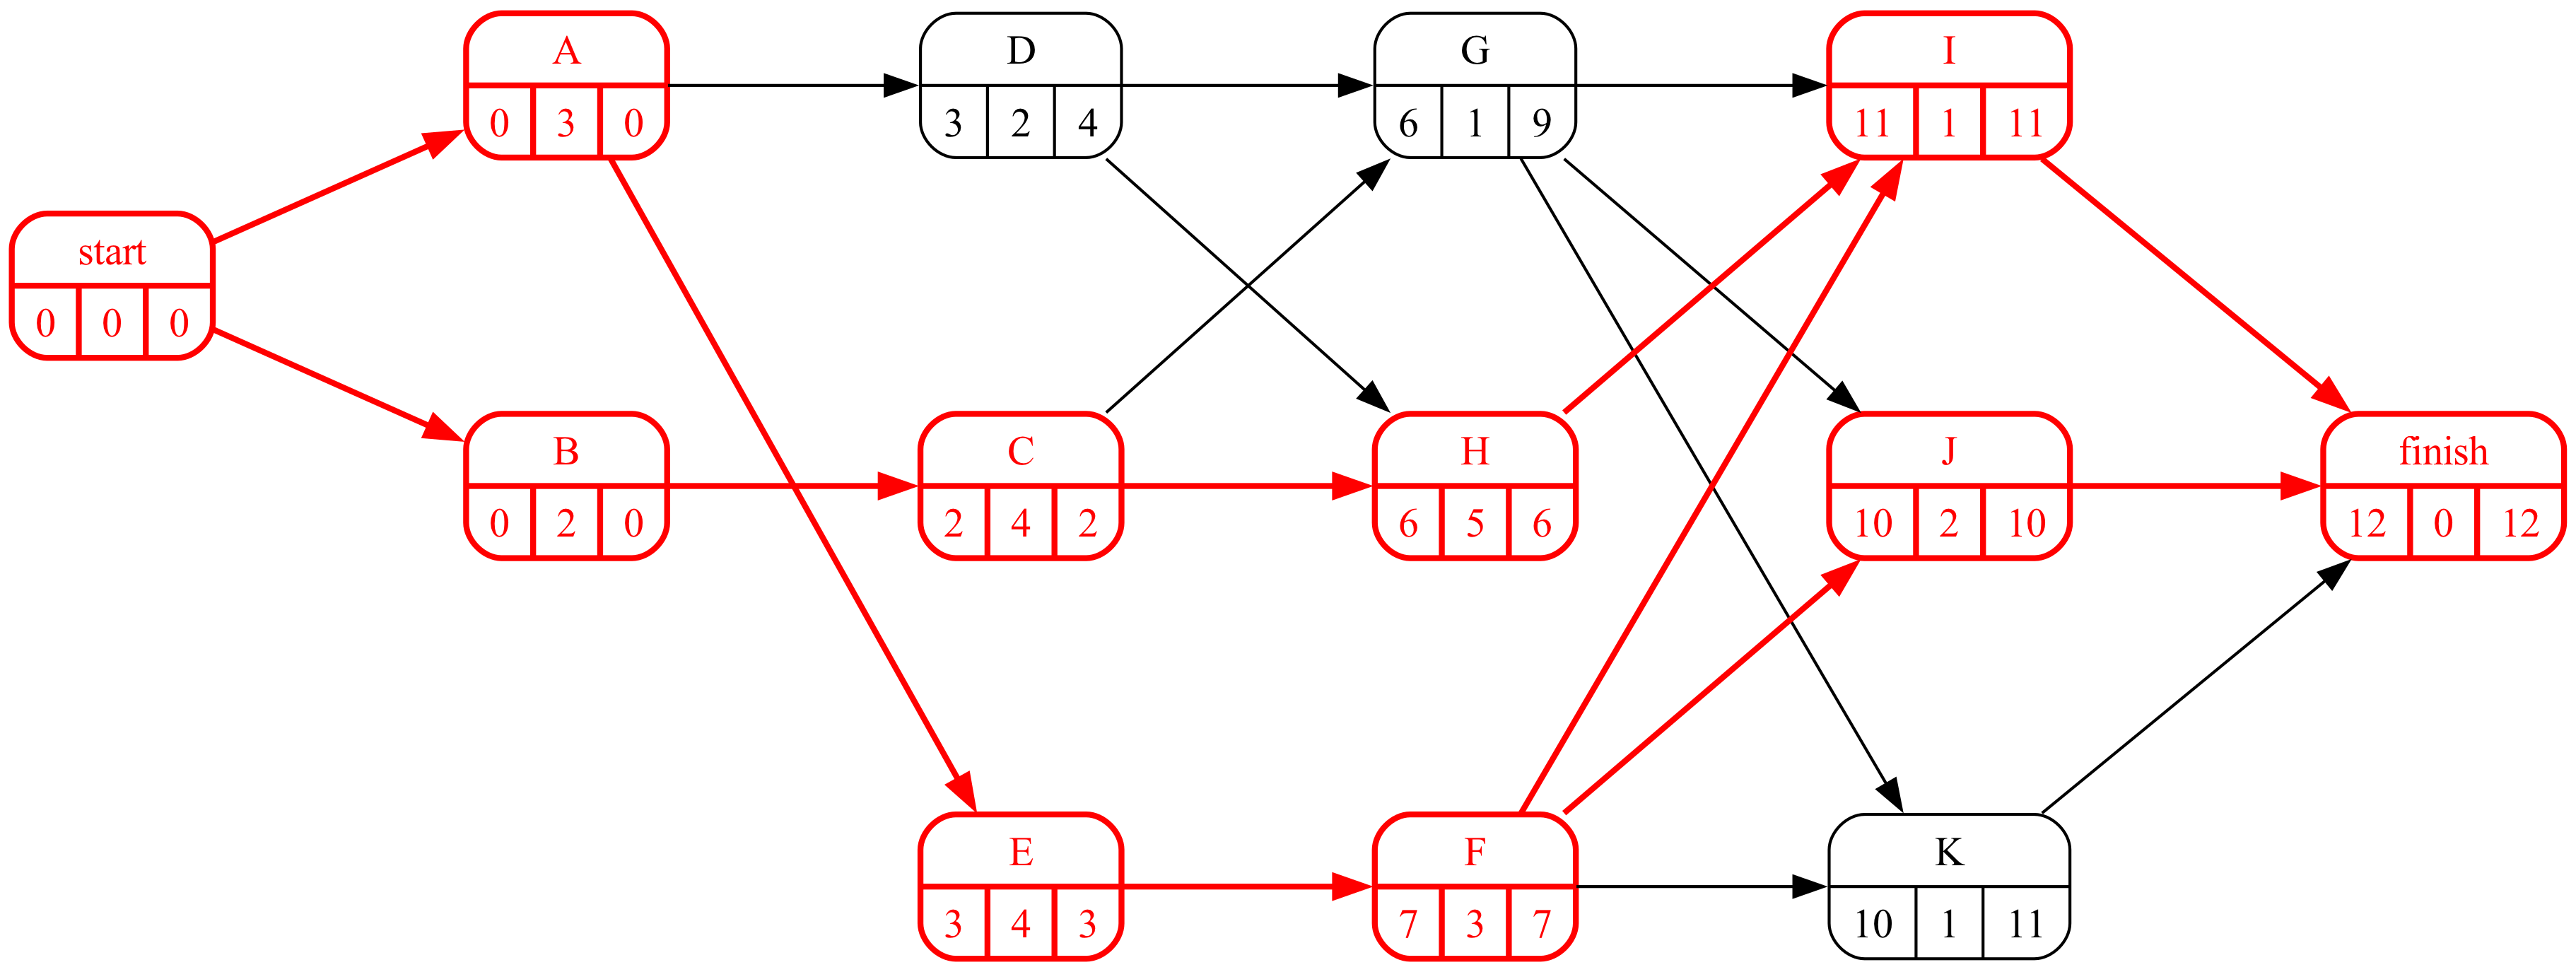

In [18]:
#| fig-cap: "Grafo Roy con indicación con indicación del camino crítico"
#| label: fig-Roycritico
proyecto.roy(durations=datos_proyecto['duration'], ranksep=1.2, nodesep=1.2)

Las rutas del camino crítico son:

In [19]:
proyecto.display_critical_path(durations=datos_proyecto['duration'])

- Route_6 :	A, E, F, J <br> 

- Route_11 :	B, C, H, I <br> 

## Apartado 2

In [20]:
display(Markdown(pregunta_2))

2. Probabilidad de terminar el proyecto antes de 9 periodos.  

In [21]:
duracion_media_proyecto = proyecto.duration(durations=datos_proyecto['duration'])

In [22]:
Markdown(f"La duración media del proyecto la conocemos del primer apartado. Tiene valor {duracion_media_proyecto} periodos.")

La duración media del proyecto la conocemos del primer apartado. Tiene valor 12 periodos.

Para determinar la desviación típica debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor.

In [23]:
datos_proyecto['variance'] = datos_proyecto.eval('standard_deviation ** 2')
desviacion_proyecto, caminos_varianza = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                  variances=datos_proyecto['variance'])

In [24]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas2
caminos_varianza

,Activities,Variance
Route_6,"A, E, F, J",5.00
Route_11,"B, C, H, I",14.00


In [25]:
display(Markdown(f"""La varianza de la duración del proyecto es la máxima varianza de las rutas críticas. Para este proyecto es {round(desviacion_proyecto**2,2)}.  
Habitualmente será útil calcular su raiz cuadrada, la desviación típica, para ser utilizada como parámetro de la ley de distribución normal.  """))
display(Markdown(f"La desviación típica es {round(desviacion_proyecto,2)}"""))

La varianza de la duración del proyecto es la máxima varianza de las rutas críticas. Para este proyecto es 14.0.  
Habitualmente será útil calcular su raiz cuadrada, la desviación típica, para ser utilizada como parámetro de la ley de distribución normal.  

La desviación típica es 3.74

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad:

In [26]:
import scipy
from scipy.stats import norm

probabilidad_antes_b = norm.cdf(periodo_probabilidad_b, loc=duracion_media_proyecto, scale=desviacion_proyecto)

Markdown(f"Para un proyecto con duración media {duracion_media_proyecto} y desviación típica {round(desviacion_proyecto, 2)} el valor de la probabilidad de terminar antes del periodo {periodo_probabilidad_b} es {round(probabilidad_antes_b * 100, 2)} por ciento.")

Para un proyecto con duración media 12 y desviación típica 3.74 el valor de la probabilidad de terminar antes del periodo 9 es 21.13 por ciento.

## Apartado 3

In [27]:
display(Markdown(pregunta_3))

3. Reducir la duración del proyecto hasta 10 periodos con el mínimo incremento posible de coste.  

In [28]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                min_durations=datos_proyecto['cap_duration'],
                costs=datos_proyecto['ucr'],
                reduction=2)

In [29]:
#| tbl-cap: "Cálculo de la reducción de la duración del proyecto mediante el algoritmo de Ackoff Sasieni"
#| label: tbl-ackoff
ackoff

,A,B,C,D,E,F,G,H,I,J,K,0,1,2
Route_1,5.0,,,-10.0,,,-20.0,,1.0,,,7.0,6.0,5.0
Route_2,5.0,,,-10.0,,,-20.0,,,-1.0,,8.0,7.0,6.0
Route_3,5.0,,,-10.0,,,-20.0,,,,5.0,7.0,6.0,5.0
Route_4,5.0,,,-10.0,,,,1.0,1.0,,,11.0,9.0,7.0
Route_5,5.0,,,,1.0,5.0,,,1.0,,,11.0,10.0,9.0
Route_6,5.0,,,,1.0,5.0,,,,-1.0,,12.0,11.0,10.0
Route_7,5.0,,,,1.0,5.0,,,,,5.0,11.0,10.0,9.0
Route_8,,5.0,25.0,,,,-20.0,,1.0,,,8.0,8.0,8.0
Route_9,,5.0,25.0,,,,-20.0,,,-1.0,,9.0,9.0,9.0
Route_10,,5.0,25.0,,,,-20.0,,,,5.0,8.0,8.0,8.0


Los desplazamientos indicados al aplicar el algoritmo de reducción con mínimo coste son:

In [30]:
for iteracion, actividades in best_option.items():
    display(Markdown(f"- Iteración {iteracion}: " + ", ".join(actividades) + " <br>"))

- Iteración 0: A, H <br>

- Iteración 1: A, H <br>

In [31]:
Markdown(f"El coste de la reducción ha sido de {2 * datos_proyecto.loc['A', 'ucr'] + 2 * datos_proyecto.loc['H', 'ucr']} unidades monetarias.")

El coste de la reducción ha sido de 12 unidades monetarias.

## Apartado 4

In [32]:
display(Markdown(pregunta_4))

4. Si el número máximo de recursos durante las 6 primeras semanas es 4, determinar si será posible realizar el proyecto en el tiempo obtenido en el apartado 1.  

### Situación inicial de partida

Representamos la demanda de recursos por periodo utilizando un diagrama de Gantt.

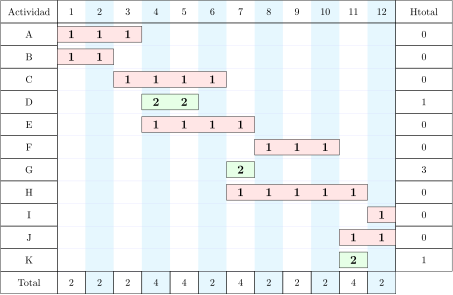

In [33]:
#| fig-cap: "Diagrama de Gantt con indicación de las cargas por periodo."
#| label: fig-ganttPartida
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.gantt(datos_proyecto, 'duration', 'resources', total='fila', holguras = True, tikz=True)
pinta_tikz(dibujo)

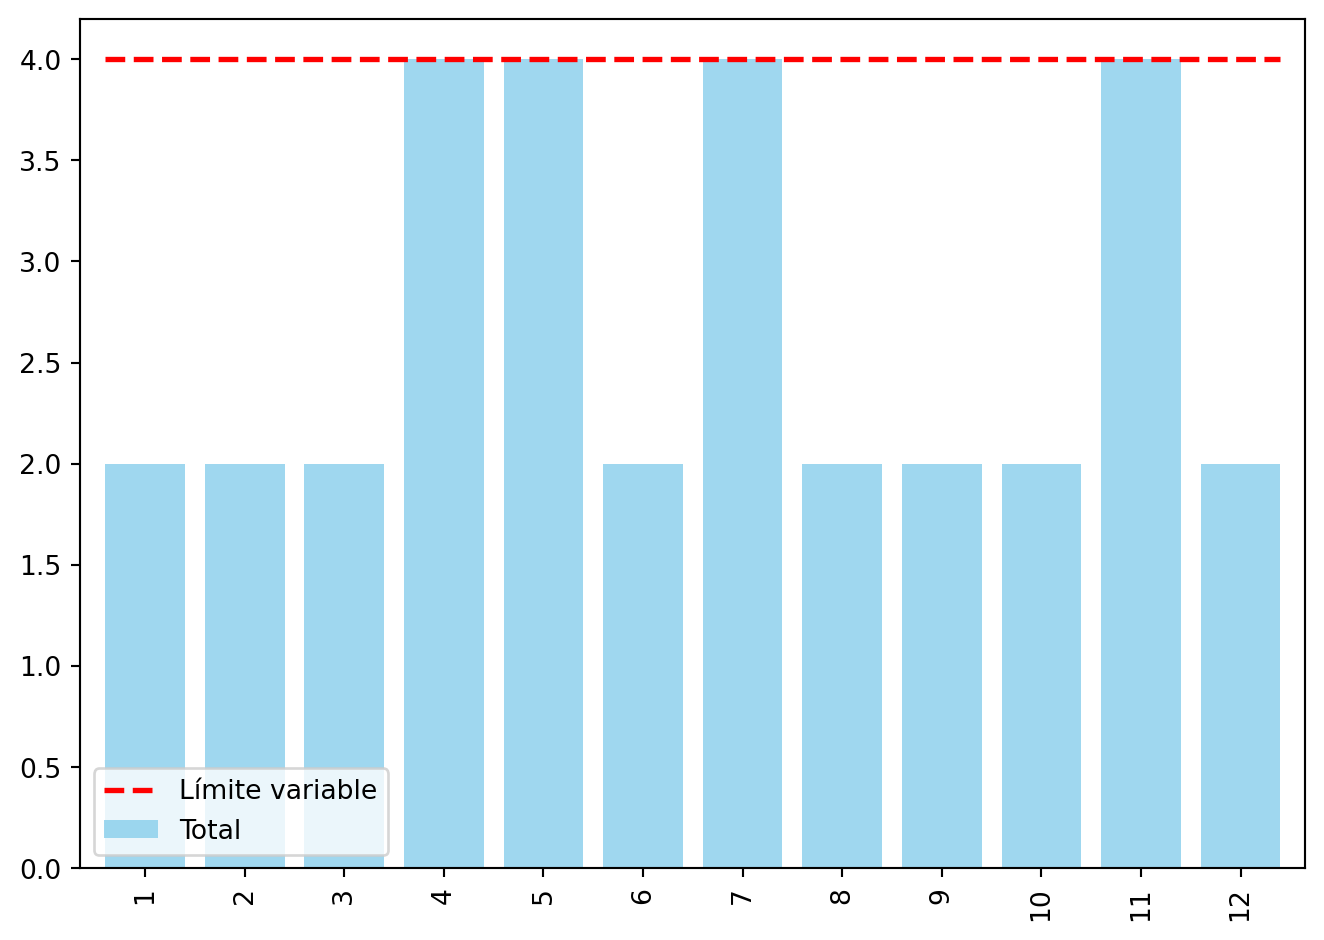

In [34]:
#| fig-cap: "Diagrama de cargas del proyecto de acuerdo a su definición original, con indicación del límite máximo de recursos"
#| label: fig-preNivelacionBarras
plot_cargas(gantt_df=gantt_df, limite_maximo_recursos=limite_maximo_recursos)

Se concluye por tanto que la restricción de recursos impuesta no implica ningún problema.